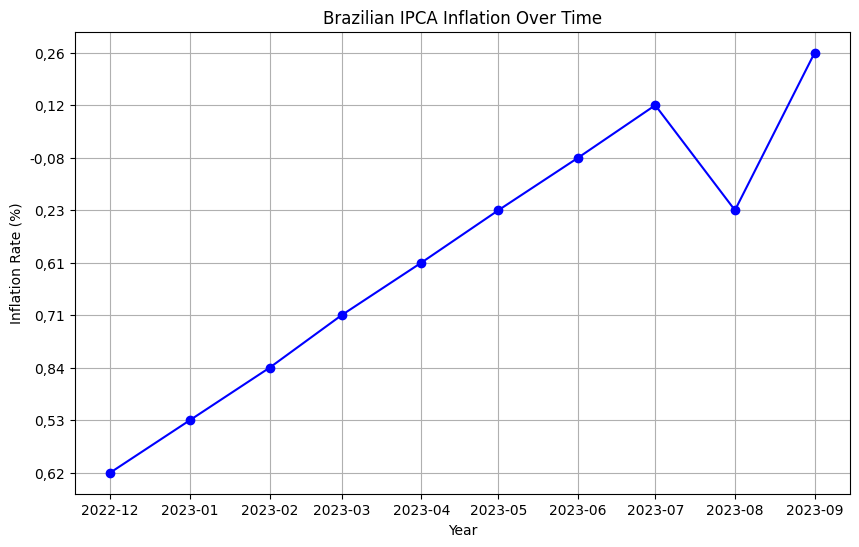

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

# Specify the URL for Brazilian IPCA inflation data
brazil_inflation_url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=csv"

# Send an HTTP GET request to fetch the data
response = requests.get(brazil_inflation_url)

# Check if the request was successful
if response.status_code == 200:
    # Create a DataFrame from the retrieved CSV data
    df = pd.read_csv(io.StringIO(response.text), delimiter=";", parse_dates=["data"], dayfirst=True)
    df= df.tail(10)
    # Set the "data" column as the index
    df.set_index("data", inplace=True)

    # Plot the Brazilian IPCA inflation data
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df["valor"], marker='o', linestyle='-', color='b')
    plt.title('Brazilian IPCA Inflation Over Time')
    plt.xlabel('Year')
    plt.ylabel('Inflation Rate (%)')
    plt.grid(True)
    # Save the chart as an image (e.g., PNG)
    plt.savefig("brazil_inflation_chart.png")
    # Show the chart
    plt.show()

else:
    print("Failed to fetch data. Status code:", response.status_code)

In [16]:
from fpdf import FPDF
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Create a PDF
class PDF(FPDF):
    def header(self):
        self.set_font('Helvetica', 'B', 30)
        self.cell(0, 10, 'Inflation Report', align='C')
        self.ln(10)

    def footer(self):
        # Page number
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', align='C')
        # Link to My GitHub
        github_link = "https://github.com/paulolaque/brazilian-inflation-pdf"
        self.set_x(-45)
        self.cell(0, 10, "GitHub: paulolaque", align='C', link=github_link)

    def chapter_title(self, title):
        self.set_text_color(101, 115, 240)  # Blue color
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1)
        self.set_text_color(0, 0, 0)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

pdf = PDF()
pdf.add_page()

# Title and description
pdf.chapter_title('Report Overview')
pdf.chapter_body('The Brazilian IPCA (Índice Nacional de Preços ao Consumidor Amplo) is the official consumer price index of Brazil. It serves as a critical economic indicator, tracking the average changes in prices of a basket of goods and services consumed by Brazilian households. The IPCA is widely used to monitor and measure inflation in the country, providing essential insights into the cost of living for Brazilians. It encompasses a broad range of categories, including food, transportation, healthcare, housing, and more. The Brazilian government and central bank rely on the IPCA to set monetary policy, control inflation, and make informed decisions regarding economic stability. Additionally, businesses and individuals use it as a reference to gauge price fluctuations, manage their finances, and plan for the future in the context of Brazil.')

# Add chart to the PDF
pdf.image('brazil_inflation_chart.png', x=20, w=170)

# Add current date
current_date = datetime.now().strftime("%Y-%m-%d")
pdf.set_font('Arial', 'I', 10)
pdf.cell(0, 10, f"Report generated on {current_date}", 0, 1)

# Add a link to the Central Bank of Brazil with "Source:"
cb_link = "https://www.bcb.gov.br/"
pdf.set_text_color(0, 0, 255)
pdf.set_font('Arial', 'U')
pdf.cell(0, 10, "Source: Central Bank of Brazil", 0, 1, 'L', link=cb_link)
pdf.set_text_color(0, 0, 0)

# Save the PDF
pdf.output('inflation_report.pdf')


''